## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd

cars = pd.read_csv('data/cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

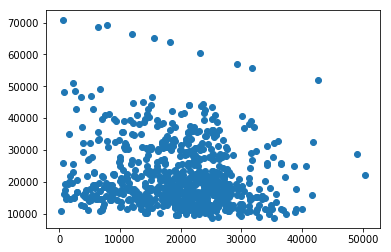

In [4]:
# Put the command (or commands) here that would give answer to the above question.
plt.scatter(cars['Mileage'], cars['Price'])
plt.show()

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [5]:
def predict(x_, slope_, intercept_):
    return slope_ * x_ + intercept_

Linear Regression Model
 slope     = -0.17252050260202137
 intercept = 24764.558991201993
 r_value   = -0.1430505060653787
 r2_value  = 0.020463447285560946
 p_value   = 4.684698031518038e-05
 std_err   = 0.04214775583437193


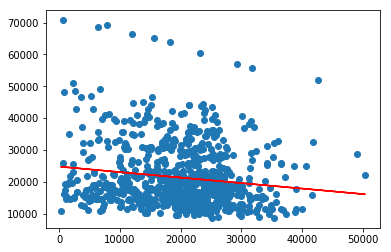

In [6]:
# Linear regression model:
from scipy import stats

x = cars['Mileage'].values
y = cars['Price'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Show summary statistics for the model:
print('Linear Regression Model')
print(' slope     =', slope)
print(' intercept =', intercept)
print(' r_value   =', r_value)
print(' r2_value  =', r_value*r_value)
print(' p_value   =', p_value)
print(' std_err   =', std_err)

y_pred = predict(x, slope, intercept)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')

plt.show()

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [7]:
# Command:
print('slope = %.3f' % (slope))

# One sentence summary:
# When the car has one additional mile on it, the price will decrease by $0.17.

slope = -0.173


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [8]:
# Single command
print('intercept = %.2f' % (intercept))

# According to the model, the expected value of a car with 0 miles is $24,764.56

intercept = 24764.56


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

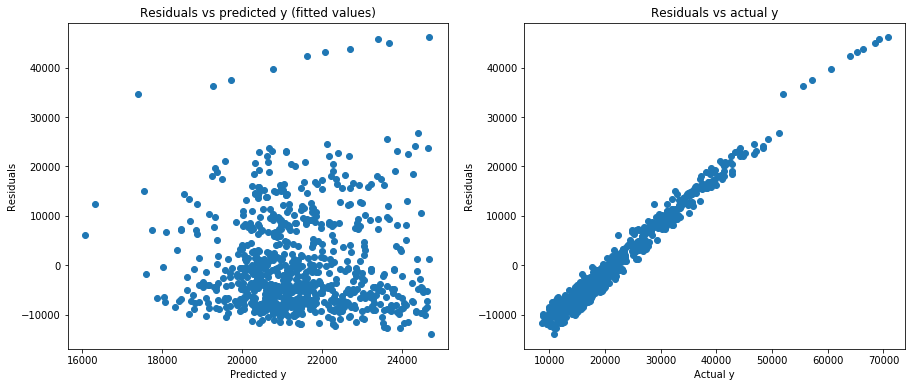

In [9]:
# Plot residuals
residuals = y - y_pred

fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].scatter(y_pred, residuals)

ax[0].set_title('Residuals vs predicted y (fitted values)')
ax[0].set_ylabel('Residuals')
ax[0].set_xlabel('Predicted y')

ax[1].scatter(y, residuals)

ax[1].set_title('Residuals vs actual y')
ax[1].set_ylabel('Residuals')
ax[1].set_xlabel('Actual y')

plt.show()

# Explain whether there are any problems (1-2 sentence)
# Yes, there is a problem. The magnitude of the residuals (i.e., the size of the error) and the variance 
# grows as the actual price and fitted values increases (non-constant variance in the errors, i.e., heteroscedasticity).

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [10]:
# Commands:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

parameters = ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']

features = cars[parameters]
target = cars['Price']

features[parameters] = scale.fit_transform(features[parameters])

print(features)

model = sm.OLS(target, features).fit()

print(model.summary())

# Explanation:
# This model performs better than the simpler model, but it still performs rather poorly (R^2 of ~0.08 vs 0.02 previously).
# The increase in accuracy is due to the (perceived) value of the car being more than just mileage.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


      Mileage  Cylinder     Doors    Cruise     Sound   Leather
0    0.033336  0.527410  0.556279  0.573520 -1.454744 -1.619142
1   -0.778264  0.527410 -1.797659  0.573520  0.687406 -1.619142
2    1.443383 -0.914896 -1.797659  0.573520  0.687406  0.617611
3    0.323159 -0.914896 -1.797659  0.573520 -1.454744 -1.619142
4   -0.273700 -0.914896 -1.797659  0.573520  0.687406  0.617611
5    0.464286 -0.914896 -1.797659  0.573520 -1.454744 -1.619142
6   -0.299215 -0.914896 -1.797659  0.573520  0.687406  0.617611
7    0.943213 -0.914896 -1.797659  0.573520 -1.454744  0.617611
8    0.636909 -0.914896 -1.797659  0.573520 -1.454744 -1.619142
9   -0.306784 -0.914896  0.556279  0.573520 -1.454744  0.617611
10  -1.199935 -0.914896  0.556279  0.573520  0.687406 -1.619142
11   0.162133 -0.914896  0.556279  0.573520  0.687406  0.617611
12   0.297888 -0.914896  0.556279  0.573520  0.687406  0.617611
13   0.876923 -0.914896  0.556279  0.573520 -1.454744 -1.619142
14   0.364056 -0.914896  0.556279  0.573

<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [11]:
# Command(s):
cars[parameters].corr()

# Comment on the result
# The maximum correlation between different parameters is 0.35. We do not expect this level of correlation to impact
# the model quality.

,Mileage,Cylinder,Doors,Cruise,Sound,Leather
Mileage,1.000000,-0.029461,-0.016944,0.025037,-0.026146,0.001005
Cylinder,-0.029461,1.000000,0.002206,0.354285,-0.089704,0.075520
Doors,-0.016944,0.002206,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.025037,0.354285,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.026146,-0.089704,-0.062530,-0.091730,1.000000,0.165444
Leather,0.001005,0.075520,-0.061969,-0.070573,0.165444,1.000000


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [16]:
chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1}
# Commands that estimate the price of 'chevy' using the model with 6 predictors
chevy = pd.DataFrame(chevy, index=[0])[parameters]

chevy[parameters] = scale.transform(chevy[parameters])
predict_chevy = model.predict(chevy)

print("Predicted price ($) for the Chevy sedan = %.2f" % (predict_chevy))

Predicted price ($) for the Chevy sedan = -1753.54


This price is unphysical, and the problem is likely due to the scaling used based on the "training" set. Since the input set used to fit and transform the features was small, new vehicles that are substantially different in features can produce unexpected and unphysical results. Below is what happens when we do not scale the data.

In [18]:
parameters = ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']

features = cars[parameters]
target = cars['Price']

model = sm.OLS(target, features).fit()

print(model.summary())

chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1}
chevy = pd.DataFrame(chevy, index=[0])[parameters]

predict_chevy = model.predict(chevy)

print("\nPredicted price ($) for the Chevy sedan = %.2f" % (predict_chevy))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1198.
Date:                Sun, 14 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:25:50   Log-Likelihood:                -8307.5
No. Observations:                 804   AIC:                         1.663e+04
Df Residuals:                     798   BIC:                         1.666e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage       -0.1196      0.030     -4.030      0.0

After removing scaling, the predicted price for this chevy is $18,586.25. This is a much more reasonable result.

<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [24]:
cars[(cars['Chevy']==1)].mean()

Price          16427.599406
Mileage        19655.587500
Cylinder           5.000000
Doors              3.375000
Cruise             0.596875
Sound              0.828125
Leather            0.809375
Buick              0.000000
Cadillac           0.000000
Chevy              1.000000
Pontiac            0.000000
Saab               0.000000
Saturn             0.000000
convertible        0.031250
coupe              0.281250
hatchback          0.187500
sedan              0.500000
wagon              0.000000
dtype: float64

In [21]:
# Commands
parameters = [i for i in list(cars.columns.values) if i != 'Price']

features = cars[parameters]
target = cars['Price']

model = sm.OLS(target, features).fit()

print(model.summary())

# Additional features were determined using typical values for other Chevy vehicles in the dataset (see above)
chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1, "Buick":0, "Cadillac":0, "Chevy":1,
         "Pontiac":0, "Saab":0, "Saturn":0, "convertible":0, "coupe":0, "hatchback":0, "sedan":1, "wagon":0}
chevy = pd.DataFrame(chevy, index=[0])[parameters]

predict_chevy = model.predict(chevy)

print("\nPredicted price ($) for the Chevy sedan = %.2f" % (predict_chevy))

# Explanation:
# 

# Comments on problems
# One of the problems we encountered was that not all the features were defined in the problem for the Chevy. This is 
# critical if we are using all features in the model. In addition, we have the problem that we cannot scale the features.
# Other than those issues, we are able to find a reasonable prediction for the expected price of this vehicle. Note that 
# if we change input features (e.g. change the car to convertible), the expected price can change greatly.

chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1, "Buick":0, "Cadillac":0, "Chevy":1,
         "Pontiac":0, "Saab":0, "Saturn":0, "convertible":1, "coupe":0, "hatchback":0, "sedan":1, "wagon":0}
chevy = pd.DataFrame(chevy, index=[0])[parameters]

predict_chevy = model.predict(chevy)

print("\nPredicted price ($) for the convertible Chevy sedan = %.2f" % (predict_chevy))

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     607.2
Date:                Sun, 14 Oct 2018   Prob (F-statistic):               0.00
Time:                        23:35:13   Log-Likelihood:                -7544.8
No. Observations:                 804   AIC:                         1.512e+04
Df Residuals:                     789   BIC:                         1.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Mileage        -0.1842      0.013    -14.664      